
## 【课程1.6】  正态性检验

利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

       value
0  10.336097
1  10.151523
2   9.169453
3   9.953089
4  11.035298


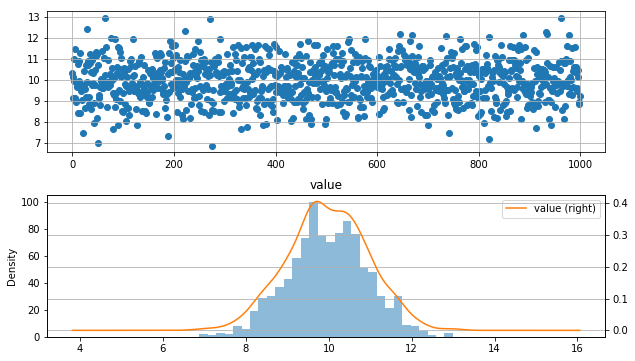

In [5]:
# 直方图初判
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图
ax2 = fig.add_subplot(2,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图
# 呈现较明显的正太性

# QQ图判断
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况
# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近
# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

       value
0  12.111567
1  10.614371
2  10.605525
3   9.118475
4  11.154935
均值为：9.98，标准差为：1.00
------
   index     value       p         q
0    605  6.851320 -0.0005 -3.125873
1    391  7.204751  0.0005 -2.773203
2    600  7.213071  0.0015 -2.764901
3    425  7.272953  0.0025 -2.705148
4    902  7.383244  0.0035 -2.595095
------
四分之一位数为：9.30，四分之三位数为：10.66
------


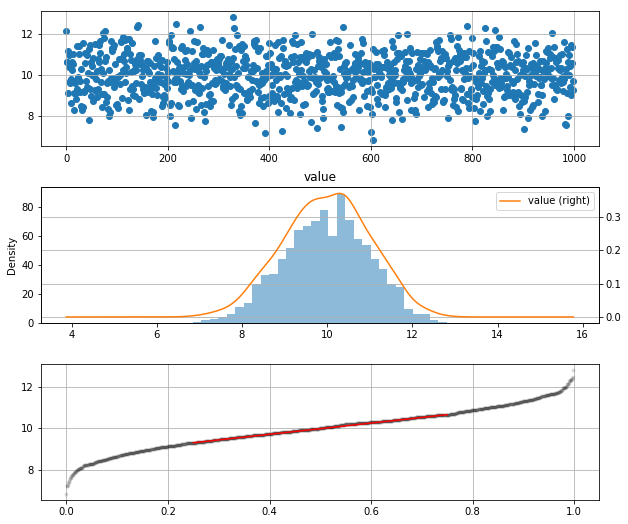

In [6]:
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace = True)  # 重新排序
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')
# 计算百分位数 p(i)
# 计算q值

st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')
# 计算四分之一位数、四分之三位数

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()
# 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布

# KS检验，理论推导

样本均值为：79.74，样本标准差为：5.94
------
实际观测D值为：0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


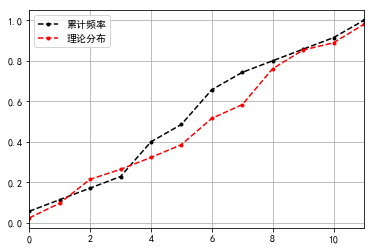

In [9]:
from dateutil.parser import parse
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度
df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()
std = df['value'].std()
print("样本均值为：%.2f，样本标准差为：%.2f" % (u,std))
print('------')
# 查看数据基本统计量
s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})
# 创建频率数据

df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803]  # 通过查阅正太分布表
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()
print("实际观测D值为：%.4f" % dmax)
# D值序列计算结果表格

df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()
# 密度图表示
df_s

In [11]:
# 直接用算法做KS检验
from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度
df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值

# p值大于0.05，为正态分布